In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/housing.csv")

In [3]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

<AxesSubplot:>

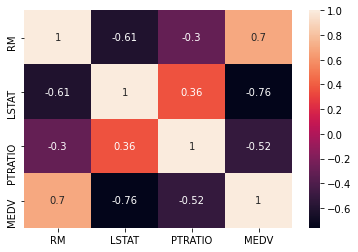

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

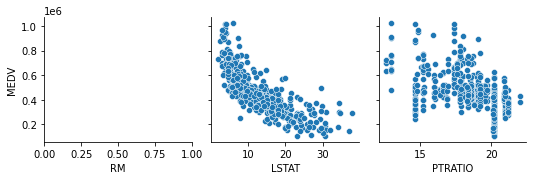

In [8]:
sns.pairplot(x_vars=['RM', 'LSTAT', 'PTRATIO'],y_vars=["MEDV"],data=df)

In [30]:
x=df.drop(columns=["MEDV","PTRATIO"])

In [31]:
y=df["MEDV"]

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [34]:
ypred=model.predict(xtest)

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [36]:
mse=mean_squared_error(ytest,ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,ypred)
print("MAE:",mae)
score=r2_score(ytest,ypred)
print("R-squared :",score)

MSE: 11479476853.820759
RMSE: 107142.32055458179
MAE: 79890.01912206096
R-squared : 0.5957692986235191


### Standard Scaler for Scaling the Data

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
sc_xtrain=sc.transform(xtrain)
sc_xtest=sc.transform(xtest)

In [38]:
model=LinearRegression()
model.fit(sc_xtrain,ytrain)

LinearRegression()

In [39]:
sc_ypred=model.predict(sc_xtest)

In [40]:
mse=mean_squared_error(ytest,sc_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,sc_ypred)
print("MAE:",mae)
score=r2_score(ytest,sc_ypred)
print("R-squared :",score)

MSE: 11479476853.820753
RMSE: 107142.32055458176
MAE: 79890.01912206096
R-squared : 0.5957692986235192


### Min Max Scaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(xtrain)
mm_xtrain=mm.transform(xtrain)
mm_xtest=mm.transform(xtest)

In [42]:
model=LinearRegression()
model.fit(mm_xtrain,ytrain)

LinearRegression()

In [43]:
mm_ypred=model.predict(mm_xtest)

In [44]:
mse=mean_squared_error(ytest,mm_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,mm_ypred)
print("MAE:",mae)
score=r2_score(ytest,mm_ypred)
print("R-squared :",score)

MSE: 11479476853.820753
RMSE: 107142.32055458176
MAE: 79890.01912206097
R-squared : 0.5957692986235192


### Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=5) 
poly_features=pf.fit_transform(xtrain)
poly_features

array([[1.00000000e+00, 6.20900000e+00, 1.32200000e+01, ...,
        8.90712783e+04, 1.89647657e+05, 4.03791596e+05],
       [1.00000000e+00, 5.42700000e+00, 1.81400000e+01, ...,
        1.75805109e+05, 5.87636756e+05, 1.96420320e+06],
       [1.00000000e+00, 5.34900000e+00, 1.97700000e+01, ...,
        2.21088017e+05, 8.17145278e+05, 3.02018361e+06],
       ...,
       [1.00000000e+00, 6.02100000e+00, 1.03000000e+01, ...,
        3.96140211e+04, 6.77668855e+04, 1.15927407e+05],
       [1.00000000e+00, 6.03000000e+00, 1.88000000e+01, ...,
        2.41606254e+05, 7.53266597e+05, 2.34849287e+06],
       [1.00000000e+00, 6.02000000e+00, 1.01100000e+01, ...,
        3.74495367e+04, 6.28928266e+04, 1.05622338e+05]])

In [55]:
model=LinearRegression()
model.fit(poly_features,ytrain)

LinearRegression()

In [56]:
pf_ypred=model.predict(pf.fit_transform(xtest))

In [57]:
mse=mean_squared_error(ytest,pf_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,pf_ypred)
print("MAE:",mae)
score=r2_score(ytest,pf_ypred)
print("R-squared :",score)

MSE: 6170743784.095846
RMSE: 78554.08190600821
MAE: 56722.50390100829
R-squared : 0.7827075118820069
